#**Lectura de paquetes y datos**

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# instalar el paquete prince
# ==============================================================================
!pip install factor_analyzer

# Gráficos
# ==============================================================================

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import FactorAnalysis

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

distutils: /home/adalisa/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /home/adalisa/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 40 kB 87 kB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=900294ffc0550fc85c83e9f799bcfd7010a9848b26d1ded1a21fb1022543d0d0
  Stored in directory: /home/adalisa/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer
distutils: /home/adalisa/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /home/adalisa/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
You should consider upgrading via the '/home/adalisa/anaconda3/bin/python -m pip install --upgrade pip' command.


#**Indicadores de deuda de países**

Los once indicadores que se detallan a continuación, han sido citados repetidamente en los reportes de las agencias calificadoras como determinantes de las calificaciones soberanas y se corresponden con los analizados por un gran número de estudios sobre riesgo crediticio soberano como determinantes de incumplimiento: 
 
1. **Producto Bruto Interno (PBI) per cápita ajustado en función de la Paridad de Poder Adquisitivo (PBIpcPPP)**
Se estima que un país con creciente nivel de vida y distribución del ingreso equitativa puede respaldar altos niveles de deuda. 
 
2. **Tasa de crecimiento anual del PBI real (cPBIr)**
Se emplea como una medida del desempeño de la economía. Una tasa de crecimiento relativamente elevada sugiere un mejoramiento dinámico del país y que, por lo tanto, será más fácil para el mismo cumplir con los servicios de su deuda en el tiempo, debido, por ejemplo, al impacto favorable sobre las finanzas públicas vía mayor recaudación fiscal. 
 
3. **Variación anual del Tipo de Cambio Real (VTCR)**
A mayor tipo de cambio, mayor es la cantidad de moneda local que se requiere para cancelar igual monto de deuda, siendo mayor la carga para cumplir con los compromisos de deuda. Adicionalmente, variaciones amplias de la cotización de la moneda local en términos del dólar estadounidense podrían ser consideradas un factor de inestabilidad.
 
4. **Inflación, medida por el Deflactor del PBI anual (DPBI)**
Una alta tasa de inflación revela problemas estructurales en las finanzas del país y puede provocar crisis económicas y descontento político. Las calificadoras de riesgo perciben la inflación como el resultado de una irresponsable administración del gobierno. 
 
5. **Cuenta Corriente/PBI (CC.PBI)**
Un déficit persistente en cuenta corriente puede implicar la necesidad de financiamiento externo y los inversores perciben, en consecuencia, que puede reducirse la capacidad de repago de la deuda. 
 
6. **Deuda Externa Total/Exportaciones (DTE.EX)**
El ratio permite tener una referencia de los futuros flujos de pagos que los residentes de un país deberán realizar a no residentes, en relación a la capacidad del país de generar los ingresos necesarios para cumplir con esos compromisos. 
 
7. **Servicio de la Deuda Externa Total/Exportaciones (SDT.EX)**
También llamado Ratio del Servicio de la Deuda, representa la suma de los reembolsos de principal e intereses realmente pagados en moneda extranjera, bienes o servicios en relación a la capacidad del país de generar los ingresos necesarios para honrar sus compromisos de deuda. Un ratio elevado refleja que una gran proporción de los ingresos por exportaciones son destinados al pago de las deudas. 
 
8. **Reservas a Importaciones en número de meses (RaImp)**
Las reservas de moneda extranjera en poder del Banco Central de un país son la primera línea de defensa ante la restricción (cancelación) de crédito externo, determinando la capacidad del país de hacer frente a un período de dificultades, en el corto plazo. La suficiencia de las reservas se mide en relación a las importaciones, determinando la cantidad de meses de importaciones que cubren las reservas disponibles. 
 
Los datos de los ocho indicadores anteriores fueron obtenidos de Indicadores de Desempeño Mundial publicada por el Banco Mundial y se consideró para cada uno de ellos el valor promedio o mediana entre los  años 2000 – 2007. 

Los siguientes tres indicadores buscan reflejar los aspectos políticos que inciden en la evaluación del riesgo crediticio de los países soberanos, se obtubvieron del Banco Mundial en Cuestiones de Gobernabilidad V del año 2007.
 
 9. **Indicador de Estabilidad Política (EP.2005)**
Este agregado combina diferentes indicadores que miden las percepciones de la probabilidad de que el gobierno en ejercicio sea desestabilizado o derrocado por medios violentos y/o inconstitucionales, incluyendo violencia política y terrorismo.
 
10. **Indicador de Calidad Regulatoria (CR.2005)**
Este agregado mide la capacidad del gobierno de formular e implementar políticas profundas y regulaciones que permitan y promuevan el desarrollo del sector privado. Incluye medidas sobre la incidencia de políticas de mercado poco amigables como los controles de precios, la supervisión inadecuada de bancos, al igual que las percepciones sobre cargas impuestas por una regulación excesiva en áreas tales como comercio internacional y desarrollo de los negocios.
 
11. **Indicador de Control de la Corrupción (CC.2005)**
En este índice se combinan indicadores que buscan reflejar la existencia de casos de ejercicio de poder público para el beneficio propio.


In [2]:
# Base de datos 
# ==============================================================================

url = 'https://drive.google.com/file/d/1DntsXvklBiZKF0hY_XsNuv2YwVKSJ_hi/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
ratios = pd.read_table(path)
ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pais             98 non-null     object 
 1   Codigo_Pais      98 non-null     object 
 2   Codigo_Ingresos  98 non-null     int64  
 3   Codigo_Region    98 non-null     int64  
 4   PBIpc            98 non-null     float64
 5   cPBIr            98 non-null     float64
 6   VTCR             98 non-null     float64
 7   DPBI             98 non-null     float64
 8   CCPBI            98 non-null     float64
 9   RaImp            98 non-null     float64
 10  DTEEx            98 non-null     float64
 11  DTEPBI           98 non-null     float64
 12  SDTEx            98 non-null     float64
 13  DPPGEx           98 non-null     float64
 14  DPPGPBI          98 non-null     float64
 15  SDPPGEx          98 non-null     float64
 16  BPGPBI           98 non-null     float64
 17  EP2007           9

In [3]:
ratios.head()

,Pais,Codigo_Pais,Codigo_Ingresos,Codigo_Region,PBIpc,cPBIr,VTCR,DPBI,CCPBI,RaImp,...,DTEPBI,SDTEx,DPPGEx,DPPGPBI,SDPPGEx,BPGPBI,EP2007,EG2007,CR2007,CC2007
0,Albania,ALB,4,2,0.0875,0.0986,-0.1675,0.0295,-0.0805,0.0957,...,0.0391,0.0175,0.0498,0.0404,0.0266,-0.0379,-0.0248,-0.0531,0.0148,-0.0812
1,Argentina,ARG,5,3,0.1679,0.0611,-0.0448,0.0850,0.0327,0.1242,...,0.1261,0.2023,0.1143,0.0910,0.1374,0.0624,0.0206,-0.0150,-0.1175,-0.0600
2,Armenia,ARM,4,2,0.0585,0.2046,-0.1868,0.0358,-0.0725,0.0794,...,0.0775,0.0540,0.0534,0.0525,0.0363,0.2688,-0.0095,-0.0350,0.0377,-0.0982
3,Azerbaijan,AZE,4,2,0.0679,0.3024,-0.0794,0.0846,-0.0235,0.0512,...,0.0304,0.0261,0.0149,0.0262,0.0156,0.0198,-0.0776,-0.0959,-0.0772,-0.1399
4,Bangladesh,BGD,3,6,0.0165,0.1005,0.0419,0.0378,-0.0002,0.0470,...,0.0526,0.0382,0.1084,0.0640,0.0714,-0.0523,-0.1563,-0.1175,-0.1313,-0.1501


In [4]:
ratios.describe()

,Codigo_Ingresos,Codigo_Region,PBIpc,cPBIr,VTCR,DPBI,CCPBI,RaImp,DTEEx,DTEPBI,SDTEx,DPPGEx,DPPGPBI,SDPPGEx,BPGPBI,EP2007,EG2007,CR2007,CC2007
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,4.112245,3.806122,0.080040,0.087929,-0.068304,0.063350,-0.050533,0.085132,0.082163,0.089152,0.080089,0.076768,0.083893,0.081219,0.006637,-0.034917,-0.047664,-0.036155,-0.058265
std,0.771699,2.264282,0.061626,0.045099,0.069966,0.046974,0.087614,0.054143,0.058632,0.045926,0.060859,0.065514,0.054563,0.058028,0.079726,0.095126,0.086752,0.092683,0.081180
min,3.000000,1.000000,0.009500,-0.002700,-0.250200,0.007500,-0.339400,0.015500,0.005000,0.008700,0.005400,0.003400,0.008300,0.004700,-0.162200,-0.274000,-0.263300,-0.239500,-0.185800
25%,4.000000,2.000000,0.025950,0.061300,-0.122575,0.028525,-0.081250,0.053325,0.045075,0.060025,0.038600,0.029150,0.039650,0.043575,-0.038775,-0.080675,-0.111250,-0.094350,-0.118375
50%,4.000000,3.000000,0.061800,0.084600,-0.062950,0.053350,-0.042200,0.068700,0.069050,0.081300,0.058650,0.058500,0.073350,0.070600,-0.006650,-0.020550,-0.059900,-0.045750,-0.074650
75%,5.000000,7.000000,0.124125,0.111325,-0.008700,0.077250,-0.005025,0.103525,0.106225,0.111925,0.103350,0.099050,0.110775,0.099225,0.036450,0.026925,0.007425,0.030800,-0.023350
max,5.000000,7.000000,0.286300,0.302400,0.092000,0.254600,0.199800,0.394600,0.304500,0.248600,0.360600,0.343200,0.265400,0.348600,0.268800,0.142100,0.181400,0.222400,0.185200


In [5]:
print('------------------------------------------')
print('Seleccionamos las variables para  trabajar')
print('------------------------------------------')

X=  ratios.iloc[:, 5:21]
# guardamos sus nombres en un  objeto
names_var =ratios.columns[5:21] 
X.describe()

------------------------------------------
Seleccionamos las variables para  trabajar
------------------------------------------


,cPBIr,VTCR,DPBI,CCPBI,RaImp,DTEEx,DTEPBI,SDTEx,DPPGEx,DPPGPBI,SDPPGEx,BPGPBI,EP2007,EG2007,CR2007,CC2007
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.087929,-0.068304,0.063350,-0.050533,0.085132,0.082163,0.089152,0.080089,0.076768,0.083893,0.081219,0.006637,-0.034917,-0.047664,-0.036155,-0.058265
std,0.045099,0.069966,0.046974,0.087614,0.054143,0.058632,0.045926,0.060859,0.065514,0.054563,0.058028,0.079726,0.095126,0.086752,0.092683,0.081180
min,-0.002700,-0.250200,0.007500,-0.339400,0.015500,0.005000,0.008700,0.005400,0.003400,0.008300,0.004700,-0.162200,-0.274000,-0.263300,-0.239500,-0.185800
25%,0.061300,-0.122575,0.028525,-0.081250,0.053325,0.045075,0.060025,0.038600,0.029150,0.039650,0.043575,-0.038775,-0.080675,-0.111250,-0.094350,-0.118375
50%,0.084600,-0.062950,0.053350,-0.042200,0.068700,0.069050,0.081300,0.058650,0.058500,0.073350,0.070600,-0.006650,-0.020550,-0.059900,-0.045750,-0.074650
75%,0.111325,-0.008700,0.077250,-0.005025,0.103525,0.106225,0.111925,0.103350,0.099050,0.110775,0.099225,0.036450,0.026925,0.007425,0.030800,-0.023350
max,0.302400,0.092000,0.254600,0.199800,0.394600,0.304500,0.248600,0.360600,0.343200,0.265400,0.348600,0.268800,0.142100,0.181400,0.222400,0.185200


In [6]:
print('--------------------------------------------------------')
print('Analisis de la estructura de correlación entre variables')
print('--------------------------------------------------------')
corrX = X.corr(method='pearson')
corrX.shape

--------------------------------------------------------
Analisis de la estructura de correlación entre variables
--------------------------------------------------------


(16, 16)

Text(0.5, 1.0, 'Matriz de correlación')

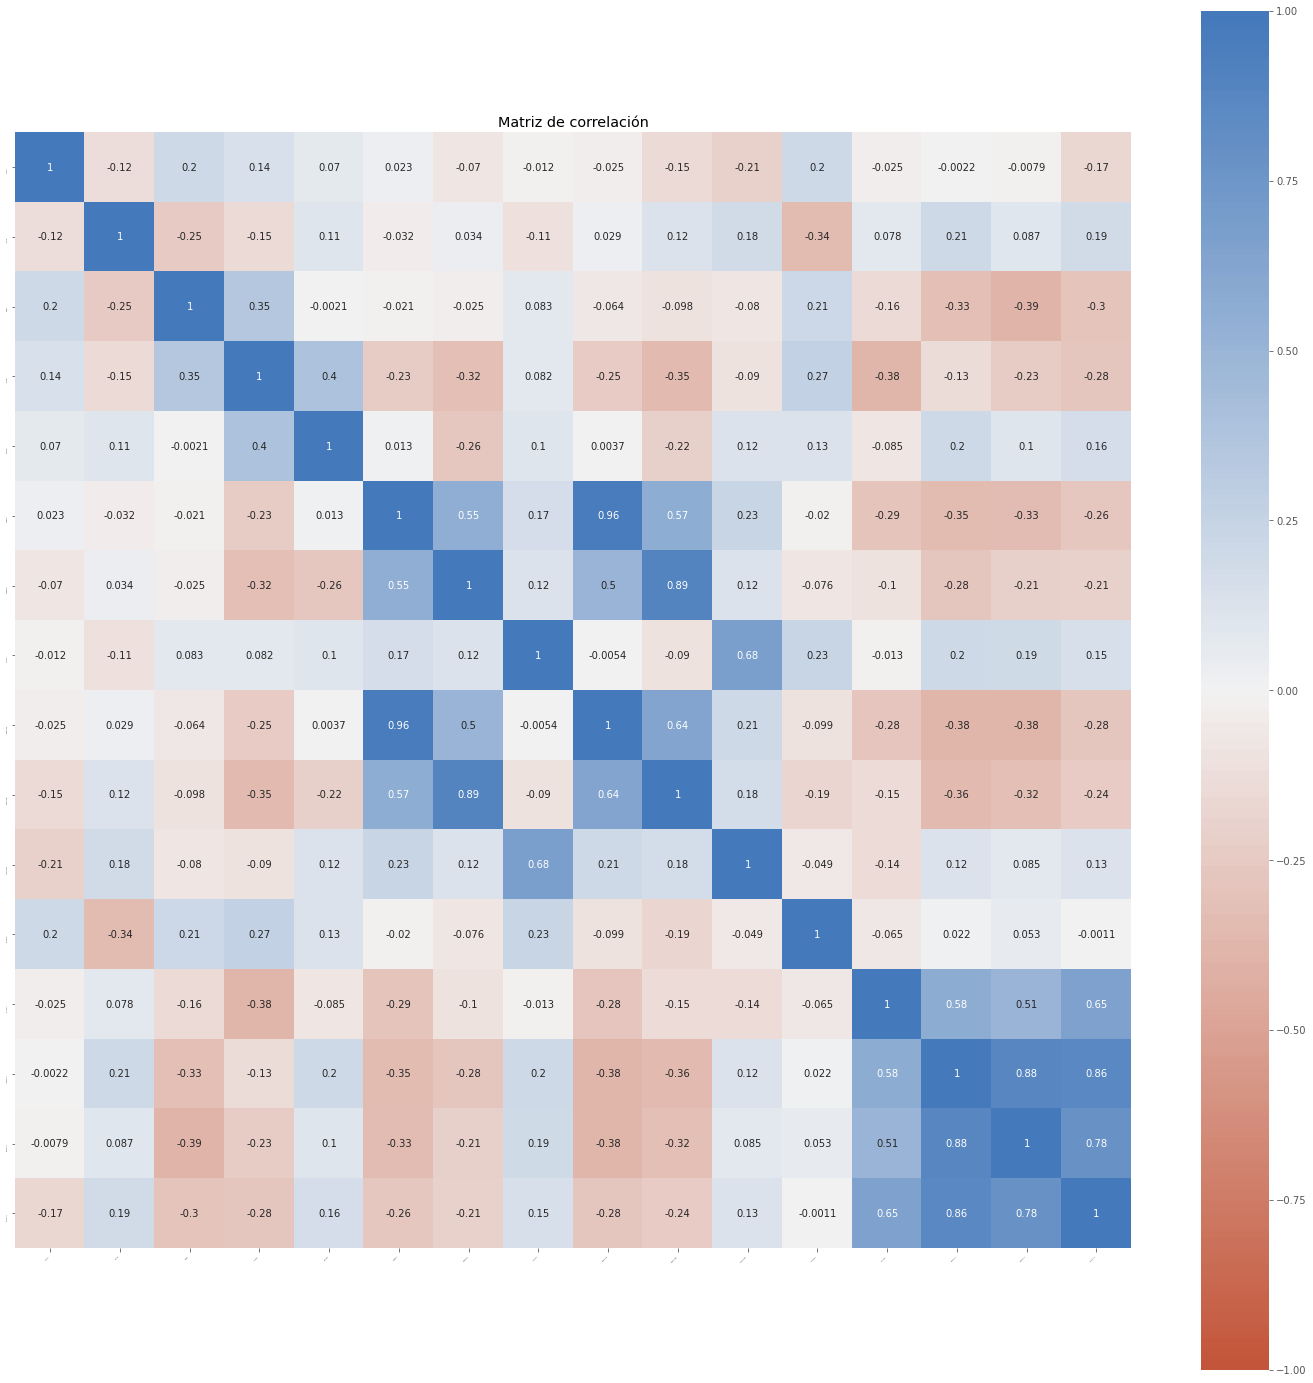

In [7]:
# Heatmap matriz de correlaciones. Usando paquete matplotlib.pyplot
# ==================================================================

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.heatmap(corrX,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 250, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 2)
plt.title('Matriz de correlación')


In [8]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=X.shape[1],rotation = None,impute = "drop",method='minres',is_corr_matrix=False)
fa.fit(X)

#Pemite la imputación de datos perdidos, impute : {'drop', 'mean', 'median'}, optional/ drop por defecto
# Metodos de ajuste que se pueden elegir: MINRES or Maximum Likelihood. Defaults to 'minres'.
  ## Al final de este colab hay una descrición de algunos métodos de estimación.

#rotation: Methods include: (a) varimax (orthogonal rotation) (b) promax (oblique rotation) (c) oblimin (oblique rotation) (d) oblimax (orthogonal rotation) (e) quartimin (oblique rotation) (f) quartimax (orthogonal rotation) (g) equamax (orthogonal rotation)    Defaults to 'promax'.
          #'promax' poir defecto.


FactorAnalyzer(impute='drop', n_factors=16, rotation=None, rotation_kwargs={})

**Determinación del número de factores**

Número máximo de factores: Los que cumplan la desigualdad $p (p+1)/2\geq p (m +1)$


In [12]:
print('----------------------------------------------------------')
print ('Elegir la cantidad de factores mirando los valores propios')
print('----------------------------------------------------------')
ev, v = fa.get_eigenvalues()
pd.DataFrame(ev)
    


----------------------------------------------------------
Elegir la cantidad de factores mirando los valores propios
----------------------------------------------------------


,0
0,4.323339
1,2.975163
2,1.972188
3,1.413933
4,1.174736
5,0.856644
6,0.775609
7,0.708365
8,0.551098
9,0.394826


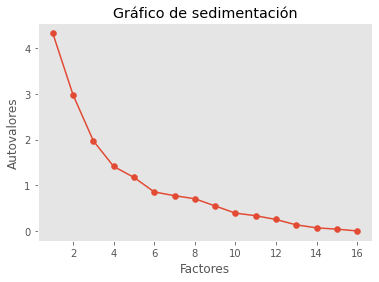

In [13]:
# Create scree plot using matplotlib
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Gráfico de sedimentación')
plt.xlabel('Factores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()  

Si la unicidad es alta ( significa que esa variable no está explicada por los constructos) Son considerados altos los valores mayores a 0,6.
Identificar las variables con valoes mayores a 0,6.

In [14]:
pd.DataFrame((fa.get_communalities(),fa.get_uniquenesses()),index=['Comunalidad','Unicidad'], columns=names_var)

,cPBIr,VTCR,DPBI,CCPBI,RaImp,DTEEx,DTEPBI,SDTEx,DPPGEx,DPPGPBI,SDPPGEx,BPGPBI,EP2007,EG2007,CR2007,CC2007
Comunalidad,0.413888,0.500024,0.562136,0.901607,0.559233,0.995092,0.995029,0.971087,0.995085,0.99503,0.970454,0.437386,0.770128,0.995,0.960799,0.995001
Unicidad,0.586112,0.499976,0.437864,0.098393,0.440767,0.004908,0.004971,0.028913,0.004915,0.00497,0.029546,0.562614,0.229872,0.005,0.039201,0.004999


**Definimos el modelo con ? factores**

In [15]:
fa5 = FactorAnalyzer(rotation = None,impute = "drop",is_corr_matrix=False,n_factors=5)
fa5.fit(X)

FactorAnalyzer(impute='drop', n_factors=5, rotation=None, rotation_kwargs={})

In [16]:
 print('--------------------------------------------------------------')
print ('Varianza de cada factor/ proporción de la varianza y acumulada')
print('---------------------------------------------------------------')
name_factor=['F1','F2','F3','F4','F5']
pd.DataFrame(fa5.get_factor_variance(),index=['Varianza factor','Proporción varianza', 'Proporción varianza acumulada'] ,columns=name_factor)

--------------------------------------------------------------
Varianza de cada factor/ proporción de la varianza y acumulada
---------------------------------------------------------------


,F1,F2,F3,F4,F5
Varianza factor,4.139762,2.645912,1.694635,0.864521,0.826963
Proporción varianza,0.258735,0.165369,0.105915,0.054033,0.051685
Proporción varianza acumulada,0.258735,0.424105,0.530019,0.584052,0.635737


In [17]:
pd.DataFrame((fa5.get_communalities(),fa5.get_uniquenesses()),index=['Comunalidad','Unicidad'],columns=names_var)

,cPBIr,VTCR,DPBI,CCPBI,RaImp,DTEEx,DTEPBI,SDTEx,DPPGEx,DPPGPBI,SDPPGEx,BPGPBI,EP2007,EG2007,CR2007,CC2007
Comunalidad,0.147338,0.328291,0.30358,0.576125,0.368178,0.937142,0.679375,0.830563,0.949893,0.774834,0.84544,0.354381,0.530045,0.922052,0.789572,0.834987
Unicidad,0.852662,0.671709,0.69642,0.423875,0.631822,0.062858,0.320625,0.169437,0.050107,0.225166,0.15456,0.645619,0.469955,0.077948,0.210428,0.165013


**Rotación**

In [18]:
fa5v= FactorAnalyzer(rotation = 'varimax' ,impute = "drop",is_corr_matrix=False,n_factors=5)
fa5v.fit(X)



FactorAnalyzer(impute='drop', n_factors=5, rotation='varimax',
               rotation_kwargs={})

In [19]:
print('----------------------------------------------------')
print ('Matriz de coeficientes o cargas factoriales rotadas')
print('-----------------------------------------------------')
Matriz_carga_rot = pd.DataFrame(fa5v.loadings_, columns=name_factor, index=names_var)
Matriz_carga_rot['Mayor carga'] = Matriz_carga_rot.idxmax(axis=1) # agrega una columna identificando la carga factorial más alta
Matriz_carga_rot_ord= Matriz_carga_rot.sort_values('Mayor carga') #ordena la matriz según los factores
Matriz_carga_rot_ord

----------------------------------------------------
Matriz de coeficientes o cargas factoriales rotadas
-----------------------------------------------------


,F1,F2,F3,F4,F5,Mayor carga
VTCR,0.115330,0.033153,0.009028,0.093008,-0.552412,F1
EP2007,0.667664,-0.164062,-0.118562,-0.206334,-0.026877,F1
EG2007,0.901779,-0.199208,0.124605,0.214242,-0.087956,F1
CR2007,0.857195,-0.189660,0.108916,0.076916,-0.032218,F1
CC2007,0.883148,-0.119527,0.106625,0.093673,-0.143549,F1
DTEEx,-0.173408,0.942510,0.125963,-0.008482,0.052995,F2
DTEPBI,-0.126566,0.564119,0.143451,-0.567366,-0.051411,F2
DPPGEx,-0.213405,0.946000,0.011900,0.009721,-0.095911,F2
DPPGPBI,-0.205569,0.629598,0.056618,-0.517920,-0.254430,F2
SDTEx,0.131139,0.042853,0.862492,0.031384,0.258170,F3


------------------------------------------------------------------------------
Gráfico para visualizar las cargas factoriales más importantes en cada factor
------------------------------------------------------------------------------


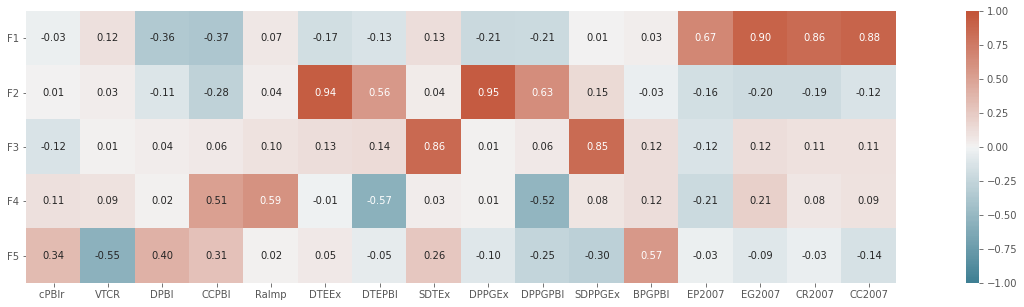

In [20]:
print('------------------------------------------------------------------------------')
print ('Gráfico para visualizar las cargas factoriales más importantes en cada factor')
print('------------------------------------------------------------------------------')
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(Matriz_carga_rot.drop('Mayor carga', axis=1).T, 
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(220, 20, n=200),
                square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

Describir los factores:






**Cálculo de los factores**

In [21]:
scores = pd.DataFrame(fa5v.fit_transform(X))


**Biplot para los factores**

In [22]:
score=scores.iloc[:,[0,1]]
score=score.to_numpy()

coeff=Matriz_carga_rot.iloc[:,[0,1]]
coeff=coeff.to_numpy()


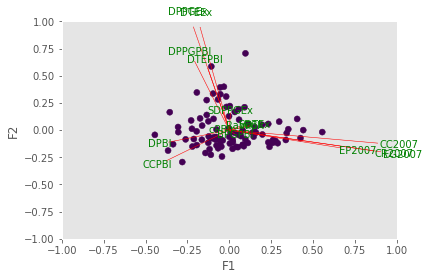

In [23]:
y= [1] *98 # esto se puede utilizar en el caso que hubiera grupos de pueden identificar,en este caso que no hay grupo se asigna a todos el valor 1

# se define una función para graficar
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("F{}".format(1))
    plt.ylabel("F{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.

myplot(score,coeff,labels=names_var)
plt.show()